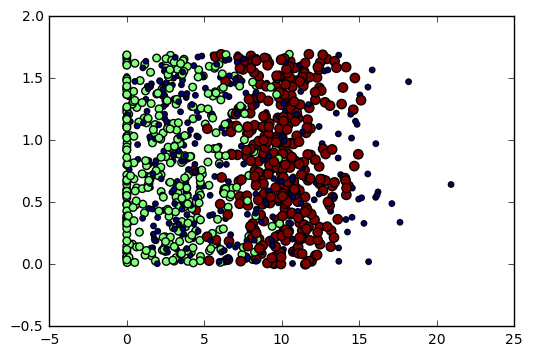

In [2]:
import numpy as np
import operator
import matplotlib
import matplotlib.pyplot as plt

# 准备数据
def file2matrix(filename):
    fr = open(filename)
    # 读取文件所有内容
    arrayOlines = fr.readlines()
    numberOfLines = len(arrayOlines)
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    # 行的索引值
    index = 0
    for line in arrayOlines:
        # 默认删除空白字符
        line = line.strip()
        # 使用‘\t’进行切片
        listFromLine = line.split('\t')
        # 将数据前三列取出来放到矩阵中
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector


"""kNN算法 分类器"""
#Parameters:
#    inX - 用于分类的数据(测试集)
#   dataSet - 用于训练的数据(训练集)
#    labes - 分类标签
#   k - kNN算法参数,选择距离最小的k个点
# Returns:
#    sortedClassCount[0][0] - 分类结果
def classify0(inX, dataSet, labels, k):
    # numpy函数shape[0]是返回dataSet的行数 shape[1]返回是列数
    dataSetSize = dataSet.shape[0]
    # tile函数在列向量方向上重复inX共一次（横向），行向量方向上重复inX共dataSetSize次（纵向）
    # (x1-x2, y1-yz)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 二维特相减后平方
    sqDiffMat = diffMat ** 2
    # sum() 所有元素相加，sum（0）列相加，sum（1）行相加
    sqDistances = sqDiffMat.sum(axis = 1)
    # 开方，计算出距离
    distances = sqDistances ** 0.5
    # 返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    # 定义一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        # 计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        #key=operator.itemgetter(1)根据字典的值进行排序
        #key=operator.itemgetter(0)根据字典的键进行排序
        #reverse降序排序字典
        sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
        # 返回次数最多的类别，即所要分类的类别
        return sortedClassCount[0][0]
    
if __name__ == "__main__":
    
    filename = "datingTestSet2.txt"
    datingDataMat, datingLabels = file2matrix(filename)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0 * np.array(datingLabels),15.0 * np.array(datingLabels))
    plt.show()

